04_scm_specific_kpis.ipynb

Further specific SCM Analysis

- Economic Order Quantity:

--> Source: https://www.investopedia.com/terms/e/economicorderquantity.asp

- Inventory Turnover

--> Source: https://www.mrpeasy.com/blog/de/lieferkette-kpis/

- Lead Times

--> Source: https://www.mrpeasy.com/blog/de/lieferkette-kpis/

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load cleaned dataset
df = pd.read_csv("C:/Users/User/OneDrive/DS/Projekte/SCM Analysis/data/cleaned/supply_chain_data_cleaned.csv")

1. Economic Order Quantity

- This metric shows the optimal number of units to order to minimize the total cost of ordering and holding inventory. A big gap between EOQ and actual order quantity may signal inefficiencies in purchasing strategy.

C:\Users\User\AppData\Local\Temp\ipykernel_18944\511037563.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eoq["EOQ"] = np.sqrt((2 * df_eoq["Number of products sold"] * order_cost) / df_eoq["Holding cost"])


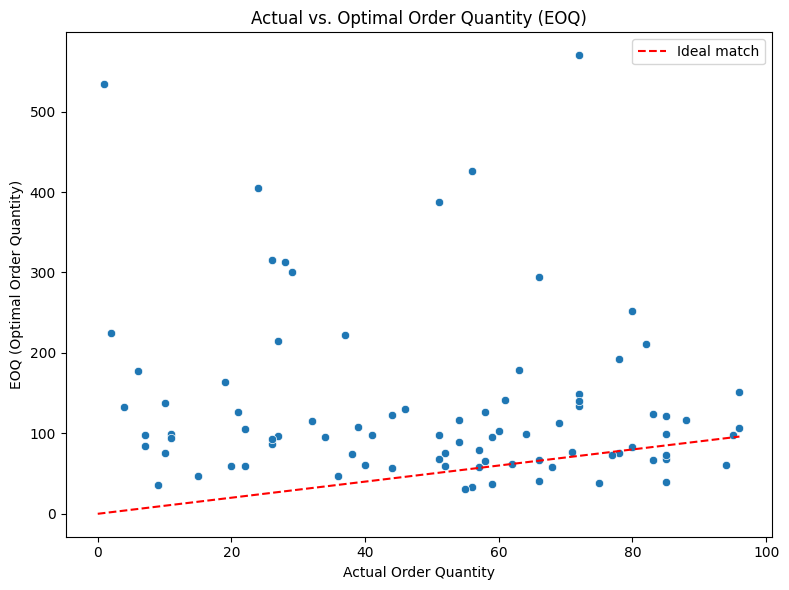

Top 5 products with the largest gap between actual order quantity and EOQ:


C:\Users\User\AppData\Local\Temp\ipykernel_18944\511037563.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eoq["EOQ gap"] = df_eoq["Order quantities"] - df_eoq["EOQ"]


,SKU,Product type,Order quantities,EOQ,EOQ gap
73,SKU74,haircare,1,534.015426,-533.015426
93,SKU94,cosmetics,72,570.015863,-498.015863
27,SKU28,cosmetics,24,405.405101,-381.405101
3,SKU4,skincare,56,425.735598,-369.735598
77,SKU78,haircare,51,387.291687,-336.291687


Die Durchschnittliche Economic Order Quantity beträgt 131.82010150479718
Die Durchschnittliche Actual Order Quantity beträgt 50.406976744186046


In [44]:
order_cost = 50  # fixed cost per order
holding_cost_rate = 0.1  # 10% of unit price

# Calculate holding cost per unit
df["Holding cost"] = df["Price"] * holding_cost_rate

# Filter: Only products with meaningful sales & availability
df_eoq = df[(df["Number of products sold"] > 50) & (df["Availability"] > 10)]

# EOQ formula: sqrt(2DS / H)
df_eoq["EOQ"] = np.sqrt((2 * df_eoq["Number of products sold"] * order_cost) / df_eoq["Holding cost"])

# --- Visualization: Actual Order Quantity vs EOQ ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_eoq, x="Order quantities", y="EOQ")
plt.plot([0, df_eoq["Order quantities"].max()], [0, df_eoq["Order quantities"].max()], 'r--', label="Ideal match")
plt.xlabel("Actual Order Quantity")
plt.ylabel("EOQ (Optimal Order Quantity)")
plt.title("Actual vs. Optimal Order Quantity (EOQ)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Identify and show deviations ---
df_eoq["EOQ gap"] = df_eoq["Order quantities"] - df_eoq["EOQ"]
df_eoq_sorted = df_eoq.reindex(df_eoq["EOQ gap"].abs().sort_values(ascending=False).index)

# Display top 5 largest gaps between actual order and EOQ
print("Top 5 products with the largest gap between actual order quantity and EOQ:")
display(df_eoq_sorted[["SKU", "Product type", "Order quantities", "EOQ", "EOQ gap"]].head())

avg_eoq = df_eoq["EOQ"].mean()
avg_order = df_eoq["Order quantities"].mean()

print(f"Die Durchschnittliche Economic Order Quantity beträgt {avg_eoq}")
print(f"Die Durchschnittliche Actual Order Quantity beträgt {avg_order}")

2. Inventory Turnover

- Indicates how many times the inventory is sold and replaced over a period. A higher turnover means better movement of stock; low turnover may suggest overstock or slow-moving items.

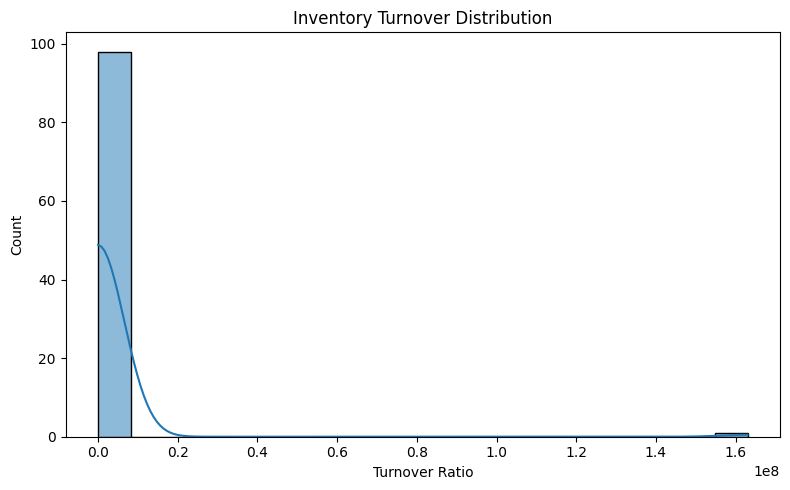

Top 5 products with highest inventory turnover:


,SKU,Product type,Inventory Turnover
67,SKU68,haircare,1.630000e+08
33,SKU34,skincare,6.019994e+02
46,SKU47,skincare,2.274999e+02
77,SKU78,haircare,1.892000e+02
3,SKU4,skincare,1.742000e+02


Der Durchschnittliche Lagerumschlag beträgt 1646493.449371726


In [45]:
# Formula: Turnover = Sales / Stock levels
# Note: Use small constant to avoid division by zero

df["Inventory Turnover"] = df["Number of products sold"] / (df["Stock levels"] + 1e-6)

plt.figure(figsize=(8, 5))
sns.histplot(df["Inventory Turnover"], bins=20, kde=True)
plt.title("Inventory Turnover Distribution")
plt.xlabel("Turnover Ratio")
plt.tight_layout()
plt.show()

print("Top 5 products with highest inventory turnover:")
display(df.sort_values("Inventory Turnover", ascending=False)[["SKU", "Product type", "Inventory Turnover"]].head())

avg_turnover = df["Inventory Turnover"].mean()
print(f"Der Durchschnittliche Lagerumschlag beträgt {avg_turnover}")


3. Lead Times

- This reflects the average time it takes from ordering to receiving goods from a supplier. Short lead times improve responsiveness, while long ones may require higher buffer stocks.

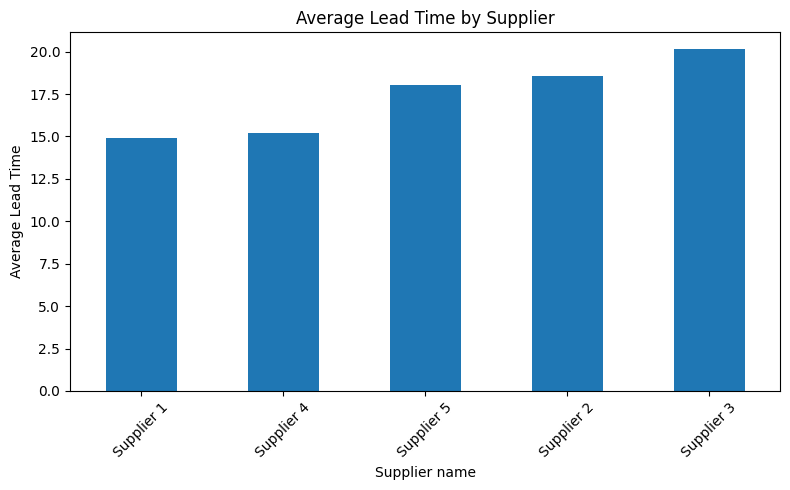

Average lead time by supplier:


Supplier name
Supplier 1    14.884615
Supplier 4    15.222222
Supplier 5    18.055556
Supplier 2    18.545455
Supplier 3    20.133333
Name: Lead time, dtype: float64

In [46]:
avg_lead = df.groupby("Supplier name")["Lead time"].mean().sort_values()

plt.figure(figsize=(8, 5))
avg_lead.plot(kind="bar")
plt.ylabel("Average Lead Time")
plt.title("Average Lead Time by Supplier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Average lead time by supplier:")
display(avg_lead)

overall_avg_lead_time = df["Lead time"].mean()
fastest_supplier = avg_lead.idxmin()
slowest_supplier = avg_lead.idxmax()


### KPI Summary & Interpretation

- The **average EOQ** across relevant products is approx. **{avg_eoq:.0f} units**, while the **actual average order quantity** is **{avg_order:.0f} units**. Several products deviate significantly, suggesting over- or under-ordering patterns.

- The **average inventory turnover** across all products is **{avg_turnover:.2f}**, indicating how efficiently stock is moving through the system.

- The **overall average lead time** is **{overall_avg_lead_time:.1f} days**.
  - The **fastest supplier** is **{fastest_supplier}**, averaging **{avg_lead.min():.1f} days**.
  - The **slowest supplier** is **{slowest_supplier}**, averaging **{avg_lead.max():.1f} days**.

**Conclusion:**  
Adjusting order quantities to align with EOQ could lower holding or ordering costs. Products with low turnover may need review. Long supplier lead times should be addressed if they impact service levels or stock availability.
